In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Axes: >

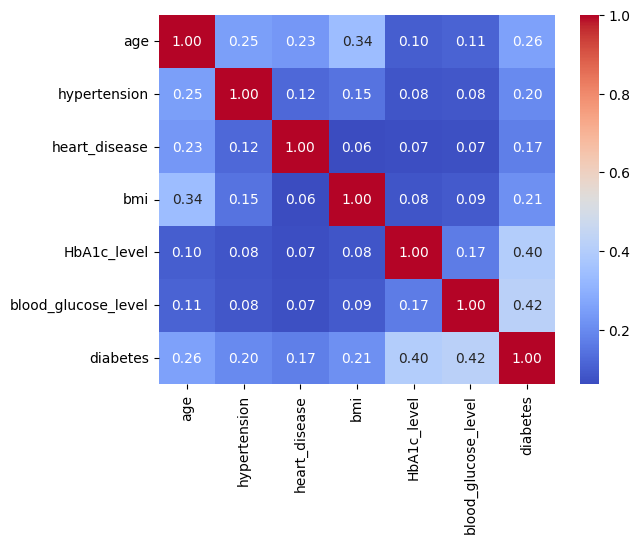

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

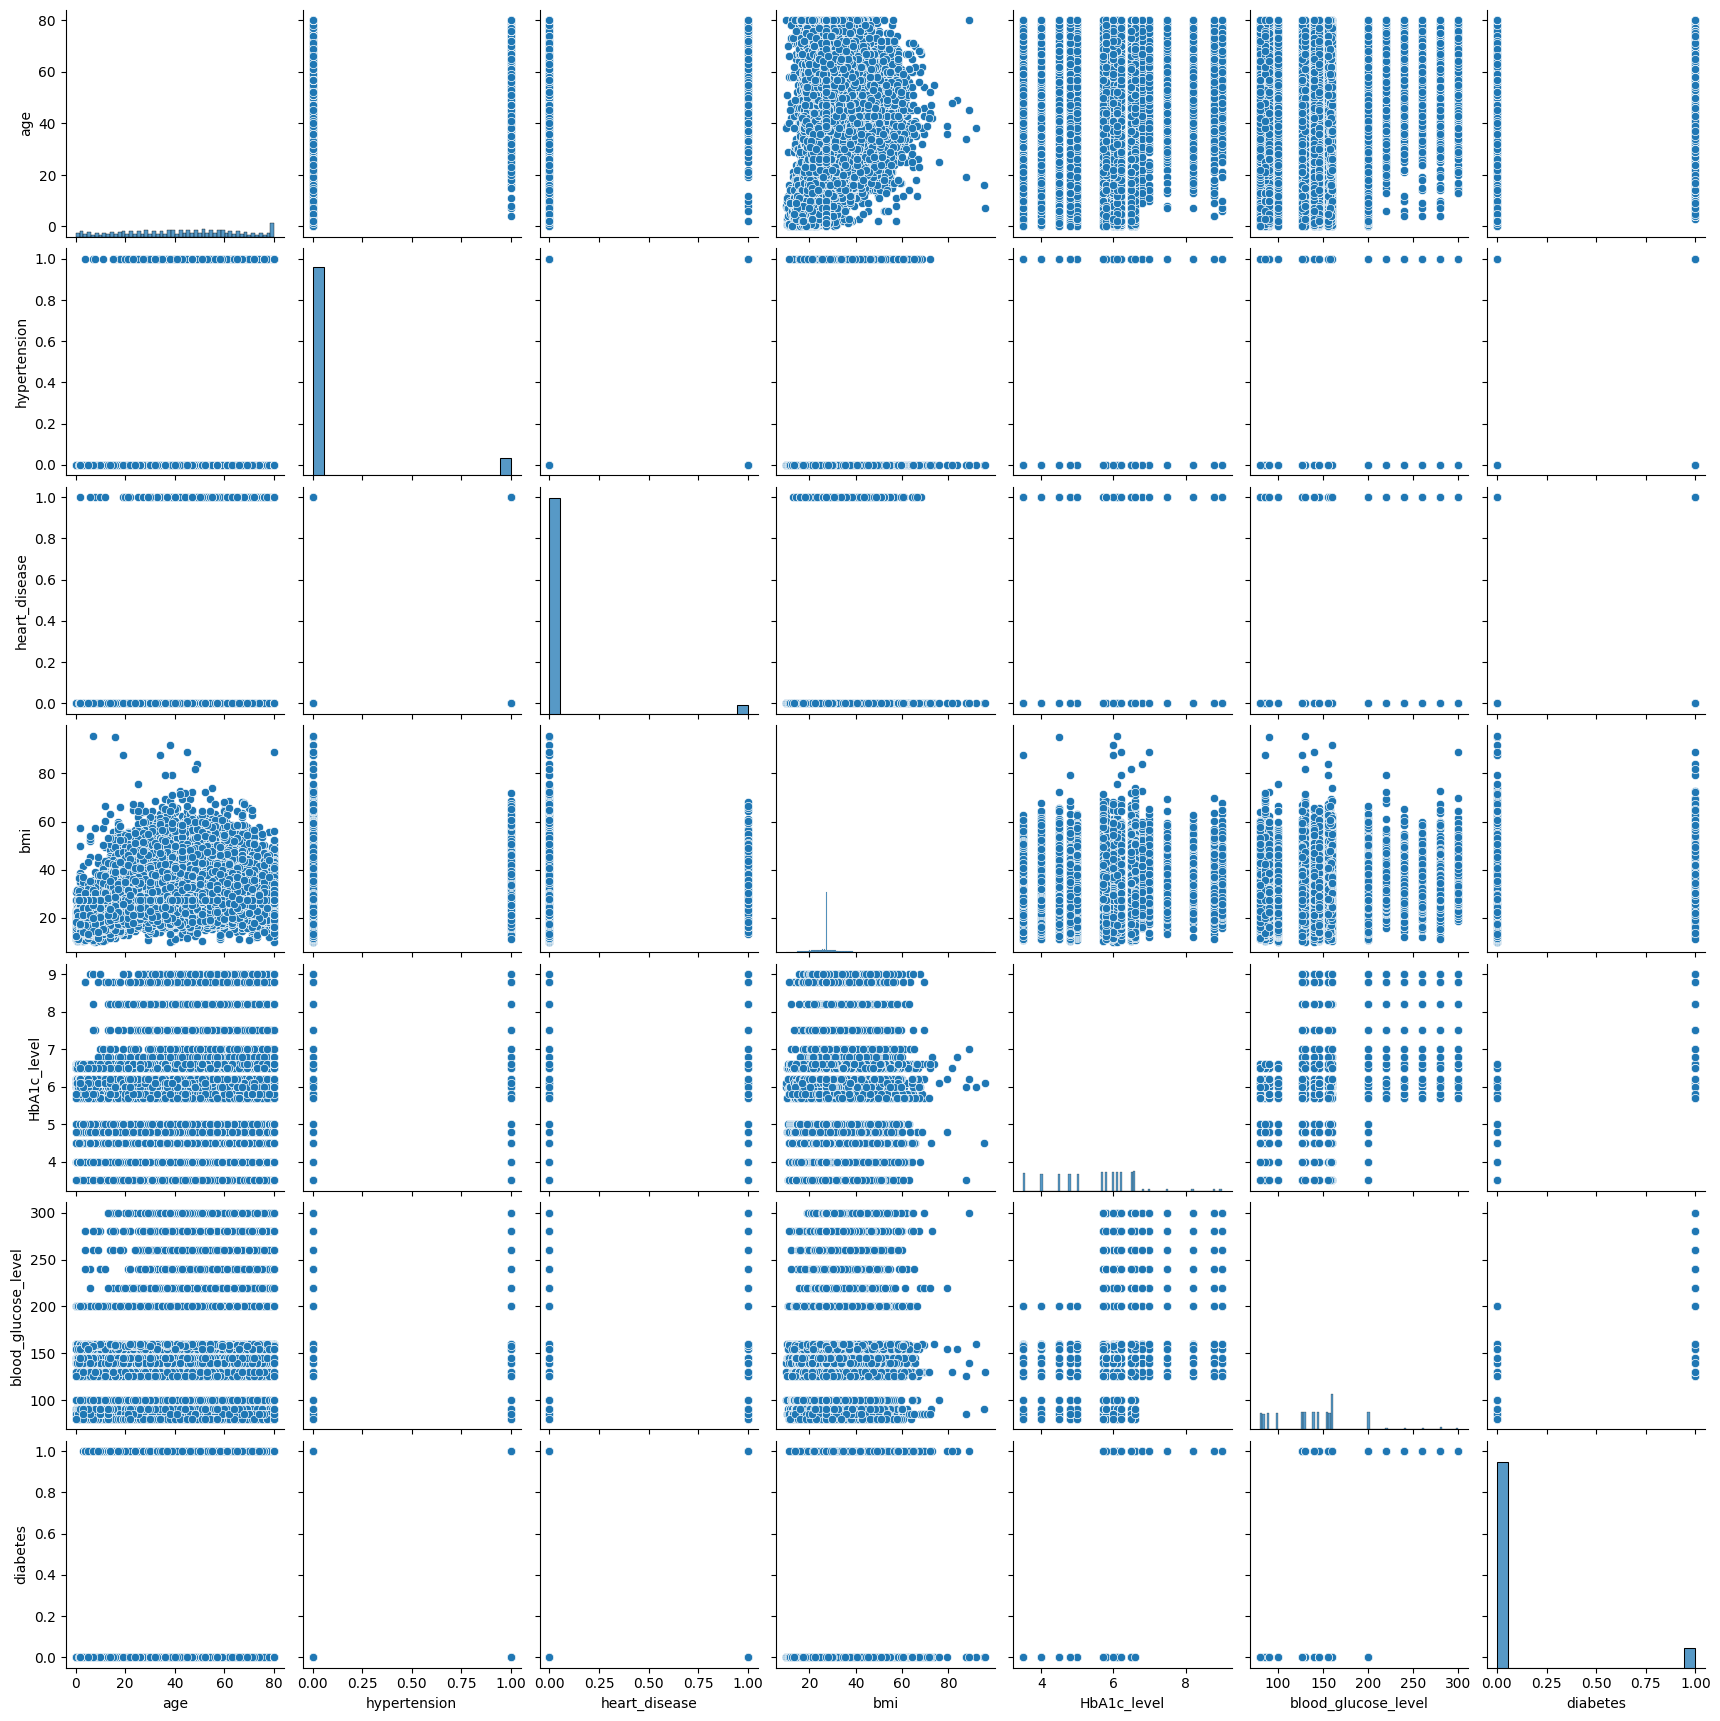

In [8]:
sns.pairplot(df)

In [10]:
df[df['age'] < 1].count()

gender                 911
age                    911
hypertension           911
heart_disease          911
smoking_history        911
bmi                    911
HbA1c_level            911
blood_glucose_level    911
diabetes               911
dtype: int64

In [11]:
df[df['bmi'] > 80].count()

gender                 9
age                    9
hypertension           9
heart_disease          9
smoking_history        9
bmi                    9
HbA1c_level            9
blood_glucose_level    9
diabetes               9
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

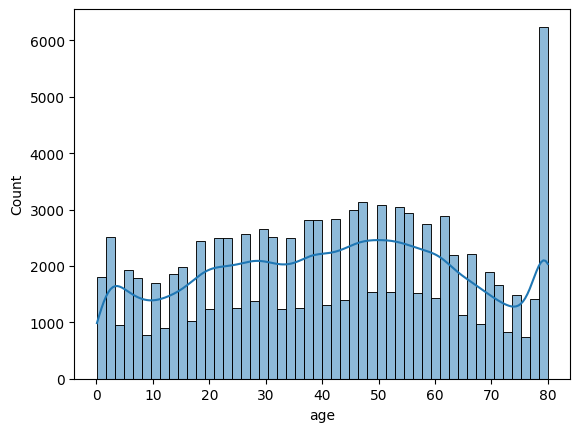

In [14]:
sns.histplot(df['age'], bins=50, kde=True)


<Axes: xlabel='bmi', ylabel='Count'>

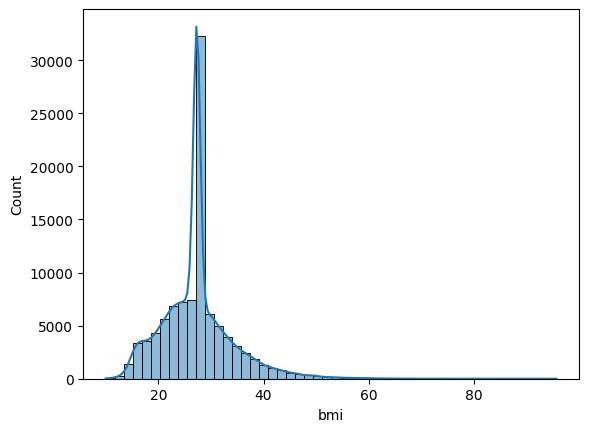

In [15]:
sns.histplot(df['bmi'], bins=50, kde=True)

In [16]:
df_clean = df[(df['age'] >= 1) & (df['bmi'] <= 80)]
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_clean)}")


Rows before cleaning: 100000
Rows after cleaning: 99080


<Axes: xlabel='blood_glucose_level', ylabel='Count'>

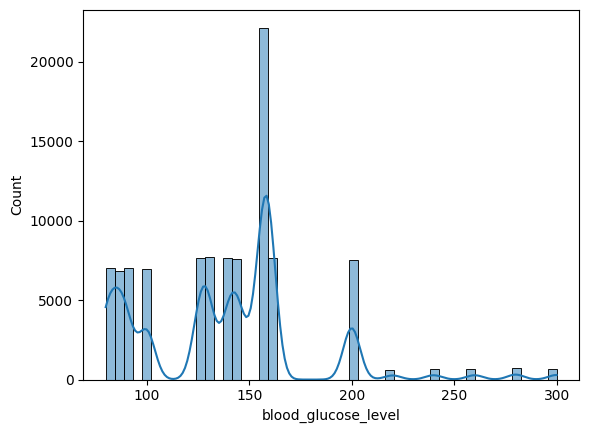

In [17]:
sns.histplot(df_clean['blood_glucose_level'], bins=50, kde=True)

<Axes: xlabel='HbA1c_level', ylabel='Count'>

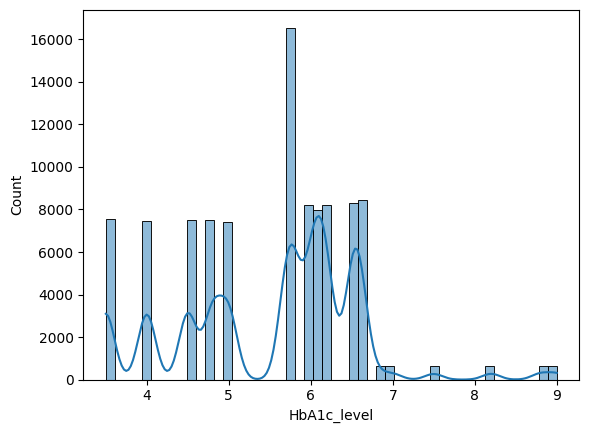

In [19]:
sns.histplot(df_clean['HbA1c_level'], bins=50, kde=True)

In [20]:
df_clean['diabetes'].value_counts()

diabetes
0    90583
1     8497
Name: count, dtype: int64

In [22]:
df_clean.to_csv('../data/processed/diabetes_prediction_clean.csv', index=False)
